# The Two Children Problem
In this excersice, we are going to simulate another (in)famous prabability pardox, **The Two Children Problem**, and several variants with varying degrees of ambiguity. 

Original problem is as follows
> Mr. Jones has two children.  
- What is the probability that both children are girls?
- Now, if at least one of them is a boy. What is the probability that both children are boys?

You are expected to write a code to simulate the **The Two Children Problem**.
For each question, there are clear instructions in each cell. Follow those instructions and write the code after each block of:
> `# YOUR CODE HERE`

In [1]:
# ! pip install ipympl
# ! apt install fonts-humor-sans
# %load_ext autoreload
# %autoreload 2

import sys
import numpy as np
import matplotlib.pyplot as plt
import functools
from numpy.random import choice

# from google.colab import drive

# drive.mount('/content/drive')
# sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks/INDP 2023')

import helper_visualize as vis

- `generate_two_children` : randomly generate a family with two children. The probability of a new-born child being a boy or a girl is, by default, identical (i.e. $P(Girl)=P(Boy) = \frac{1}{2}$).


In [3]:
def generate_two_children(prob=[0.5, 0.5]):
    """
    Randomly generate a family with two children

    Parameters
    ----------
    prob: probability of Boy/Girl

    Returns
    ----------
    return a pair of string "B" or "G" in list.
    E.g. ["B", "B"] for two boys family and ["B, "G"] for one boy (older) and one girl (younger) family
    """

    # Finsh the code and uncomment the lines below
    # children_info = YOUR CODE HERE
    children_info = choice(["B", "G"], 2, p=prob)

    return children_info

- `two_boys` : pick(generate) a two-children family and check if the family has two boys
- `two_boys_cond_ALOB` : pick(generate) a two-children family and check if the family has two boys, given that **A**t **L**east **O**ne of them is a **B**oy.

In [5]:
def two_boys():
    children_info = generate_two_children()
    return 1 if all(children_info == "B") else 0


def two_boys_cond_ALOB():
    children_info = generate_two_children()
    while not any(children_info == "B"):
        children_info = generate_two_children()
    return 1 if all(children_info == "B") else 0

findfont: Font family ['Humor Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Humor Sans'] not found. Falling back to DejaVu Sans.


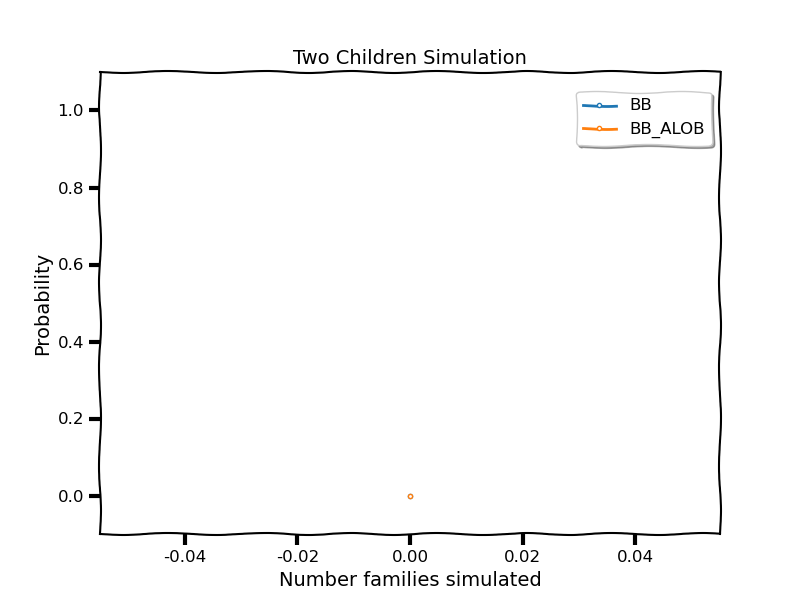

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 1.6666666269302368, 'type': 'set_device_pixel_ratio'}


In [6]:
def run_two_children_experiment():
    run_stay = ("BB", functools.partial(two_boys))
    run_switch = ("BB_ALOB", functools.partial(two_boys_cond_ALOB))

    vis.visualize_simulation(
        [run_stay, run_switch],
        ylabel="Probability",
        xlabel="Number families simulated",
        title=f"Two Children Simulation",
    )


run_two_children_experiment()

Now we are going to test more complex yet interesting varieties of this problem!

> Mr. Jones has two children. I met him walking along the street with a boy whom he proudly introduces as his son. He also told me that the boy was born on a Tuesday. 
- What is the probability that Mr. Jones's other child is also a boy?

To test this scenario, we are going to write a code for 
- `generate_birthday` :
- `two_boys_cond_ALBT`: pick(generate) a two-children family and check if the family has two boys, given that **A**t **L**east **O**ne of them is a **B**oy and the boy in born on a **T**uesday.

In [26]:
def generate_birthdays():
    """
    Randomly generate a family with two children

    Parameters
    ----------
    prob: probability of Boy/Girl

    Returns
    ----------
    return a pair of string "B" or "G" in list.
    E.g. ["B", "B"] for two boys family and ["B, "G"] for one boy (older) and one girl (younger) family
    """

    # Finsh the code and uncomment the lines below
    # children_info = YOUR CODE HERE
    birthday_info = choice(["Mon", "Tue", "Wed", "Thr", "Fri", "Sat", "Sun"], 2)

    return birthday_info


def two_boys_cond_ALOBT():
    children_info = generate_two_children()
    birthday_info = generate_birthdays()
    while not any(children_info == "B") or not any(birthday_info[children_info == "B"] == "Tue"):
        children_info = generate_two_children()
        birthday_info = generate_birthdays()
    return 1 if all(children_info == "B") else 0

In [ ]:
def run_two_children_experiment():
    run_BB = ("BB", functools.partial(two_boys))
    run_ALOB = ("BB_ALOB", functools.partial(two_boys_cond_ALOB))
    run_ALOBT = ("BB_ALOBT", functools.partial(two_boys_cond_ALOBT))

    vis.visualize_simulation(
        [run_BB, run_ALOB, run_ALOBT],
        ylabel="Probability",
        xlabel="Number families simulated",
        title=f"Two Children Simulation",
    )


run_two_children_experiment()